# Spatial Precision Error + Chaos = Randomness
From https://blog.evjang.com/2020/09/chaos.html

In [30]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
def logistic_map(x, r=3.25):
    return r * x * (1 - x) 

In [19]:
precisions = range(12, 0, -1)
n_iter = 1000
n_samples = 1000
rand_space = np.random.rand(n_samples)

results = np.zeros(shape=(len(precisions), n_samples))

for i, prec in enumerate(precisions):
    x0s = 0.5 + rand_space * (10 ** -prec)
    xns = np.zeros(shape=x0s.shape)
    for j, x0 in enumerate(x0s):
        xn = x0
        for _ in range(n_iter):
            xn = logistic_map(r=3.7, x=xn)
            
        xns[j] = xn
        
    results[i, :] = xns

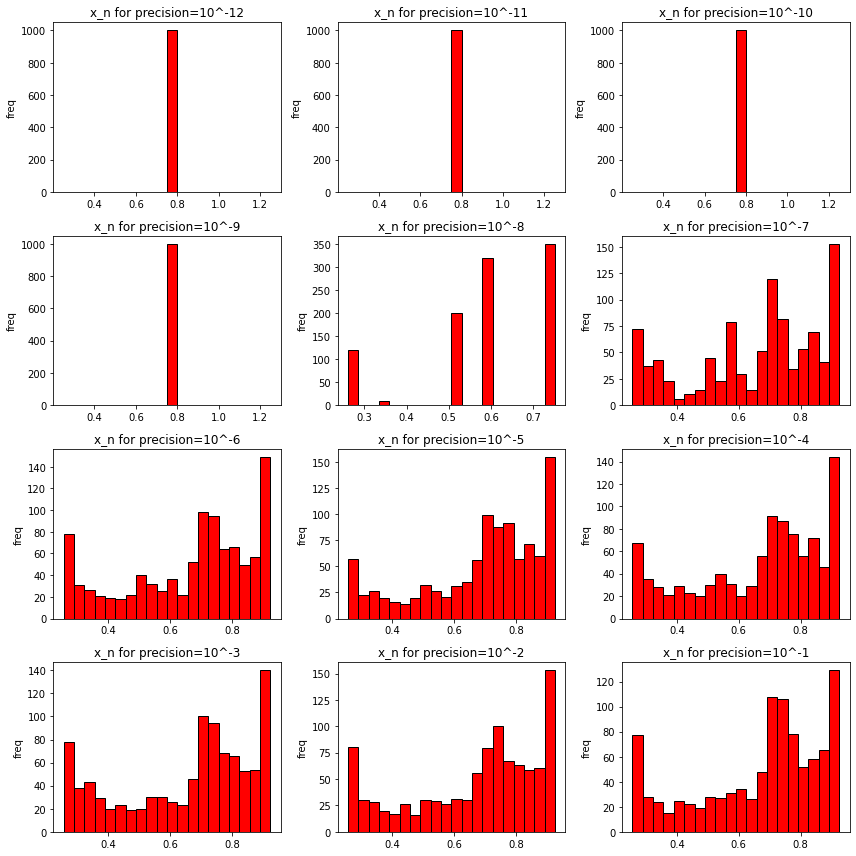

In [47]:
fig, axes = plt.subplots(4, 3, figsize=(12, 12))

for prec, xns, ax in zip(precisions, results, axes.flatten()):
    ax.hist(xns, edgecolor='black', linewidth=1, color='red', bins=20)
    ax.set_title(f'x_n for precision=10^-{prec}')
    ax.set_ylabel('y_n')
    ax.set_ylabel('freq')
    
    
plt.tight_layout()

plt.show()